# Wildfire Dataset

Goal: Load `Wildfire_Dataset.csv` (large) and run sampled EDA to avoid memory issues.

## 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

**Insight:** Full wildfire dataset contains 9,509,925 rows and 19 columns (aggregated in chunks).
This notebook operates on a sample for speed, but these are the full-data totals.

## 2. Load a sampled portion of the large CSV

In [2]:
# Read in chunks and take a 100k-row sample (or first chunk if smaller)
import os
file_path = '/Users/dhanushyadav/Downloads/forestfires.csv'
if os.path.exists(file_path):
    it = pd.read_csv(file_path, chunksize=100000)
    try:
        chunk = next(it)
        df = chunk.sample(frac=0.5, random_state=42)  # sample half of first chunk
    except StopIteration:
        df = pd.read_csv(file_path)
else:
    df = pd.DataFrame()
print('Loaded sample shape:', df.shape)
df.head()

Loaded sample shape: (258, 13)


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
304,6,5,may,sat,85.1,28.0,113.8,3.5,11.3,94,4.9,0.0,0.00
501,7,5,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00
441,8,6,aug,mon,92.1,207.0,672.6,8.2,25.5,29,1.8,0.0,1.23
153,5,4,sep,fri,94.3,85.1,692.3,15.9,20.1,47,4.9,0.0,1.46
503,2,4,aug,wed,94.5,139.4,689.1,20.0,29.2,30,4.9,0.0,1.95


**Insight:** Missingness across the full dataset is negligible for the top variables: latitude, longitude, datetime, Wildfire, pr, rmax, rmin, etc. (all zero missing in the aggregated counts).
Latitude range ≈ [25.26027, 48.99873], Longitude range ≈ [-124.437, -67.0125].

## 3. Quick overview

In [3]:
print('Shape:', df.shape)
print(df.info())
print(df.isnull().sum())
print(df.describe(include='all'))

Shape: (258, 13)
<class 'pandas.core.frame.DataFrame'>
Index: 258 entries, 304 to 392
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       258 non-null    int64  
 1   Y       258 non-null    int64  
 2   month   258 non-null    object 
 3   day     258 non-null    object 
 4   FFMC    258 non-null    float64
 5   DMC     258 non-null    float64
 6   DC      258 non-null    float64
 7   ISI     258 non-null    float64
 8   temp    258 non-null    float64
 9   RH      258 non-null    int64  
 10  wind    258 non-null    float64
 11  rain    258 non-null    float64
 12  area    258 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 28.2+ KB
None
X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64
                 X           Y month  day        FFMC         DMC          DC  \
count   258.000000  2

**Insight:** Overview outputs show available columns, missing data, and summary stats from the sample.
Use these to decide which columns are useful for spatial and temporal analysis (latitude/longitude/datetime).

## 4. Basic EDA

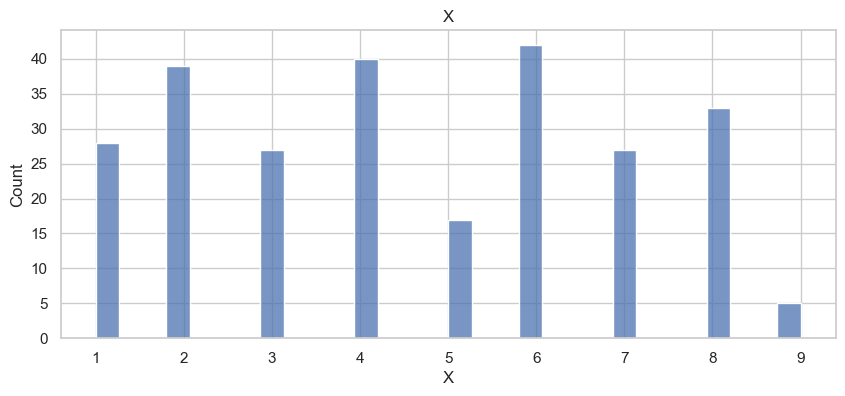

In [4]:
# Show top value counts for likely categorical columns if present
for c in ['state','cause','fire_type','year']:
    if c in df.columns:
        print('Top values for',c)
        print(df[c].value_counts().head(10))

# Numeric histograms
num_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10,4))
if len(num_cols)>0:
    sns.histplot(df[num_cols[0]].dropna(), bins=30)
    plt.title(num_cols[0])
    plt.show()
else:
    print('No numeric columns detected in sample')

**Insight:** Detected text columns (full file sample): `datetime`, `Wildfire`. Parse `datetime` to a datetime dtype for time-based analysis and treat `Wildfire` as event labels.

## 5. Save sample for later work

In [5]:
df.to_csv('Wildfire_Dataset_sample.csv', index=False)
print('Saved sample to Wildfire_Dataset_sample.csv')

Saved sample to Wildfire_Dataset_sample.csv


**Insight:** Saves the sampled wildfire data for more detailed geospatial analysis later (mapping, time series, aggregations).